In [3]:
import numpy as np  
import pandas as pd  
import yfinance as yf  

import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [4]:
ticker = 'PG' 
data = pd.DataFrame()
# data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']
data[ticker] = yf.download(ticker, start='2007-1-1')['Close']
log_returns = np.log(1 + data.pct_change())

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28760\1644441903.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data[ticker] = yf.download(ticker, start='2007-1-1')['Close']
[*********************100%***********************]  1 of 1 completed


In [5]:
log_returns.tail()

,PG
Date,
2025-10-29,-0.017326
2025-10-30,0.005430
2025-10-31,0.005268
2025-11-03,-0.015751
2025-11-04,-0.005759


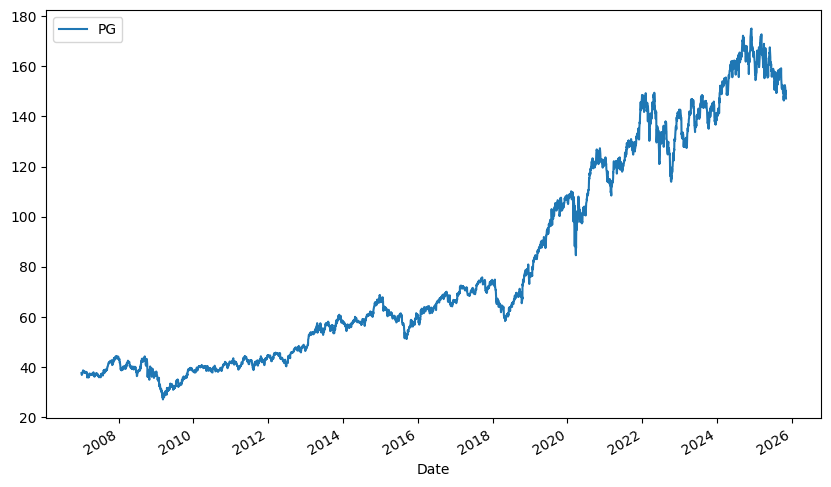

In [6]:
data.plot(figsize=(10, 6));

<Axes: xlabel='Date'>

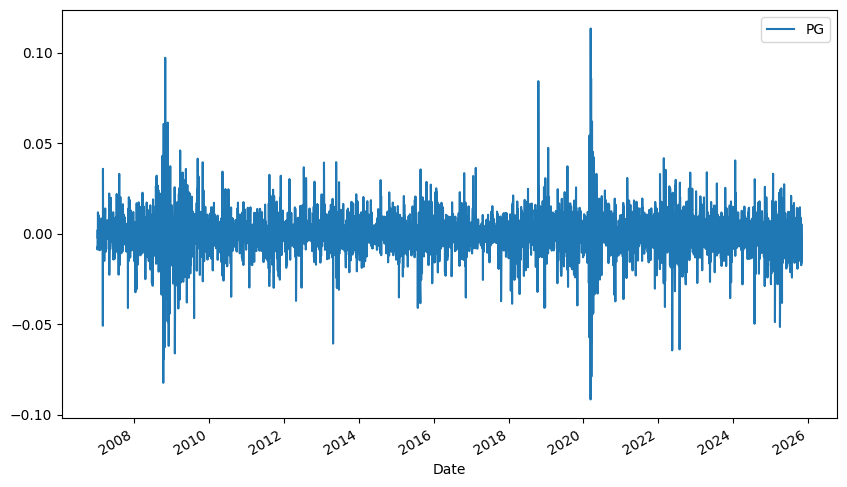

In [7]:
log_returns.plot(figsize = (10, 6))

In [8]:
u = log_returns.mean()
u

PG    0.000288
dtype: float64

In [9]:
var = log_returns.var()
var

PG    0.000135
dtype: float64

In [10]:
drift = u - (0.5 * var)
drift

PG    0.00022
dtype: float64

In [11]:
stdev = log_returns.std()
stdev

PG    0.011631
dtype: float64

******

In [12]:
type(drift)

pandas.core.series.Series

In [13]:
type(stdev)

pandas.core.series.Series

In [14]:
np.array(drift)

array([0.00022012])

In [15]:
drift.values

array([0.00022012])

In [16]:
stdev.values

array([0.01163132])

In [17]:
norm.ppf(0.95)

1.6448536269514722

In [18]:
x = np.random.rand(10, 2)
x

array([[0.1979247 , 0.79041772],
       [0.51868529, 0.3137721 ],
       [0.90609021, 0.36288946],
       [0.12618755, 0.20328814],
       [0.68601024, 0.56181483],
       [0.20629469, 0.15321688],
       [0.96760756, 0.44886183],
       [0.88182891, 0.93469374],
       [0.58501999, 0.33517062],
       [0.11647163, 0.20194671]])

In [19]:
norm.ppf(x)

array([[-0.84905732,  0.80787151],
       [ 0.04685422, -0.4851863 ],
       [ 1.3170568 , -0.35074599],
       [-1.14459952, -0.82993369],
       [ 0.48457264,  0.15557207],
       [-0.81934538, -1.02273372],
       [ 1.84673967, -0.12853746],
       [ 1.18417907,  1.51169086],
       [ 0.21475284, -0.42567973],
       [-1.19281137, -0.83468798]])

In [20]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.54825434,  1.17771288],
       [ 0.53046316, -0.1968318 ],
       [ 0.37121037, -1.48991131],
       [-0.5559164 , -1.00119004],
       [-1.29141786, -2.59930485],
       [ 0.32482479,  1.10616662],
       [ 1.14920899, -0.33941647],
       [-0.57103714, -0.82165982],
       [ 0.10504916,  1.63661393],
       [ 0.2754995 ,  0.2168796 ]])

In [21]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [22]:
daily_returns

array([[0.99601515, 0.99968159, 0.99598817, ..., 1.00604142, 0.99444857,
        0.9973078 ],
       [1.01718449, 1.00114477, 1.0003084 , ..., 0.98952819, 1.02744966,
        1.01436915],
       [0.99700185, 1.00566618, 0.975421  , ..., 0.9956267 , 0.97874275,
        0.99794572],
       ...,
       [1.00331319, 1.01290749, 0.99752649, ..., 1.0077471 , 1.0182253 ,
        1.01026829],
       [1.0039135 , 0.99981444, 1.02340201, ..., 1.00242978, 1.00038681,
        0.99703419],
       [1.01221339, 0.99180589, 1.01005574, ..., 0.99285538, 1.00720544,
        1.00314539]])

***

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [23]:
S0 = data.iloc[-1]
S0

PG    147.169998
Name: 2025-11-04 00:00:00, dtype: float64

In [24]:
price_list = np.zeros_like(daily_returns)

In [25]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
price_list[0] = S0
price_list

array([[147.16999817, 147.16999817, 147.16999817, ..., 147.16999817,
        147.16999817, 147.16999817],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [28]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [29]:
price_list

array([[147.16999817, 147.16999817, 147.16999817, ..., 147.16999817,
        147.16999817, 147.16999817],
       [149.6990397 , 147.33847335, 147.21538579, ..., 145.62886199,
        151.20976408, 149.28470566],
       [149.25021964, 148.1733197 , 143.59697904, ..., 144.99198322,
        147.99546027, 148.97803358],
       ...,
       [174.80376025, 105.08258232, 245.12721814, ..., 244.82736742,
        208.7594352 , 210.94846782],
       [175.48785442, 105.0630836 , 250.86368768, ..., 245.42224384,
        208.84018538, 210.32283422],
       [177.6311562 , 104.20218516, 253.38630703, ..., 243.6687942 ,
        210.34497126, 210.98438129]])

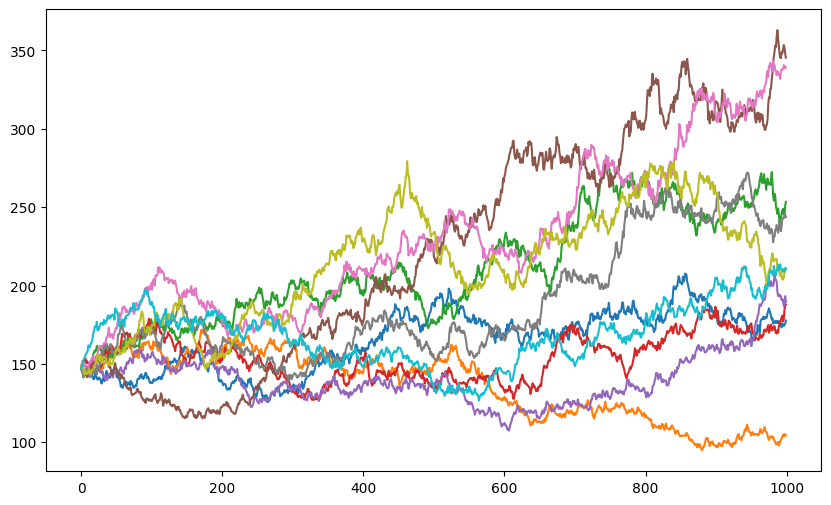

In [30]:
plt.figure(figsize=(10,6))
plt.plot(price_list);